# K-Means Clustering with python
V1.0 2022/05/10

V2.0 2024/05/25

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets._samples_generator import make_blobs
from sklearn.datasets._samples_generator import make_moons
from sklearn.datasets._samples_generator import make_circles
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import KMeans


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


## 生成高斯分布簇组成的合成数据集，各向同性的高斯blob

In [4]:
X,y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
rng = np.random.RandomState(42)
centers = [0,4] + rng.randn(4,2)

In [5]:
def draw_points(ax, color, factor = 1):
    ax.scatter(X[:,0], X[:,1],c = color, cmap = 'viridis', s = 50*factor, alpha = 0.3)
    

In [6]:
def draw_centers(ax, centers, factor = 1, alp=1.0):
    ax.scatter(centers[:,0], centers[:,1],c = np.arange(4), cmap = 'viridis', s = 200*factor, alpha = alp)
    ax.scatter(centers[:,0], centers[:,1],c = 'black', s= 50*factor, alpha = alp)

In [7]:
def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax
    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3288\2183216298.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0], X[:,1],c = color, cmap = 'viridis', s = 50*factor, alpha = 0.3)


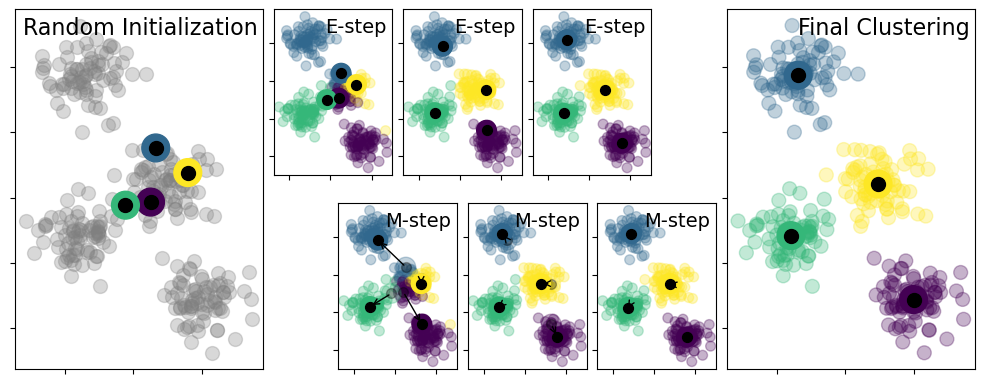

In [8]:
fig = plt.figure(figsize = (10,4))
gs = plt.GridSpec(4,15,left=0.02,right=0.98,bottom=0.05,top=0.95,wspace=0.2,hspace=0.4)
ax0 = make_ax(fig,gs[:4,:4])
ax0.text(0.98,0.98,'Random Initialization',transform=ax0.transAxes, ha='right',va='top',size=16)
draw_points(ax0,'gray',factor=2)
draw_centers(ax0,centers,factor=2)
for i in range(3):
    ax1 = make_ax(fig,gs[:2,4+2*i:6+2*i])
    ax2 = make_ax(fig,gs[2:,5+2*i:7+2*i])
    #E-step
    y_pred = pairwise_distances_argmin(X,centers)
    draw_points(ax1,y_pred)
    draw_centers(ax1,centers)
    #M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2,y_pred)
    draw_centers(ax2,centers,alp=0.3)
    draw_centers(ax2,new_centers)
    for i in range(4):
        ax2.annotate('',new_centers[i],centers[i],arrowprops=dict(arrowstyle='->',linewidth=1))

    #Finish iteration
    centers = new_centers
    ax1.text(0.95,0.95,"E-step", transform=ax1.transAxes, ha ='right',va='top',size=14)
    ax2.text(0.95,0.95,"M-step", transform=ax2.transAxes, ha ='right',va='top',size=14)
#Final E-Step
y_pred = pairwise_distances_argmin(X,centers)
axf = make_ax(fig,gs[:4,-4:])
draw_points(axf, y_pred, factor = 2)
draw_centers(axf,centers,factor = 2)
axf.text(0.98,0.98,"Final Clustering", transform=axf.transAxes, ha='right',va='top',size=16)

fig.savefig('05.25-expectation-maximization.png')
                  

k-means is limited to linear cluster boundaries. The fundametal model assumptions of k-means(points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

## Generating Synthetic Datasets 
## 生成半月形的二分类数据集moons
## 生成圆形的二分类数据集circles

In [9]:
X1,y1 = make_moons(200,noise=0.05,random_state=0)
X2,y2 = make_circles(500,factor=0.5, noise=0.05,random_state=0) # Scale factor between inner and outer circle

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3288\4216669826.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:,0],X1[:,1], c='blue', s=50,cmap='viridis');


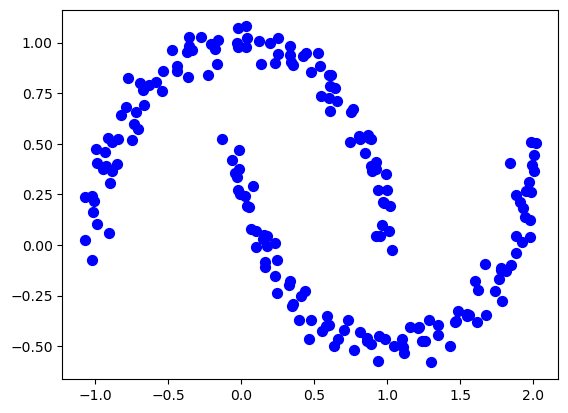

In [10]:
plt.scatter(X1[:,0],X1[:,1], c='blue', s=50,cmap='viridis');

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3288\1503182497.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:,0],X2[:,1], c='green', s=50,cmap='viridis');


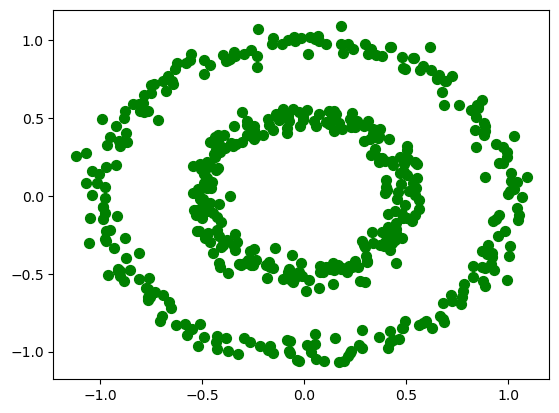

In [11]:
plt.scatter(X2[:,0],X2[:,1], c='green', s=50,cmap='viridis');

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


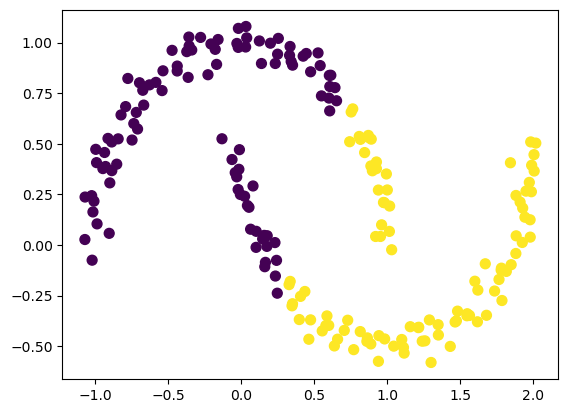

In [12]:
labels = KMeans(2,random_state=0).fit_predict(X1)
plt.scatter(X1[:,0],X1[:,1], c=labels, s=50,cmap='viridis');

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


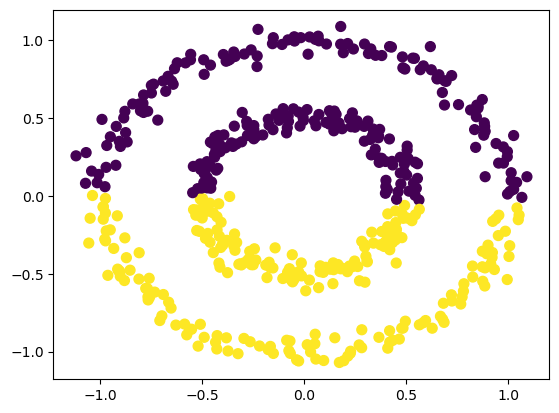

In [13]:
labels = KMeans(2,random_state=0).fit_predict(X2)
plt.scatter(X2[:,0],X2[:,1], c=labels, s=50,cmap='viridis');

In this situation, we used a kernel transformation to project the data into a higher dimension where a linear separation is possible. One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher dimensional representation of the data.

E:\anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


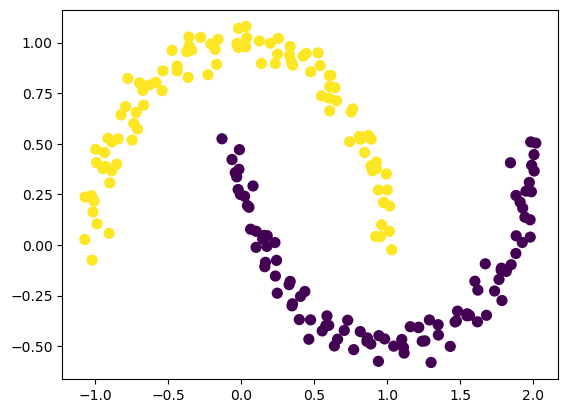

In [14]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X1)
plt.scatter(X1[:,0],X1[:,1],c=labels,s=50,cmap='viridis');

E:\anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


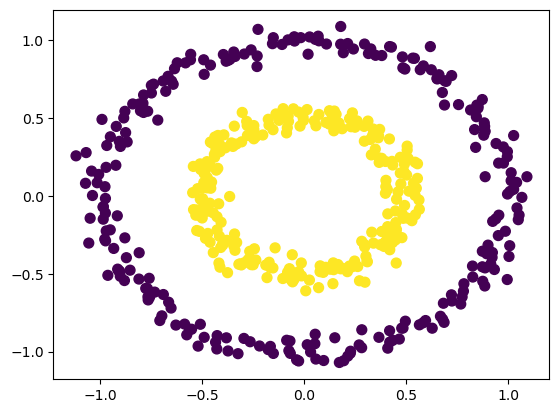

In [15]:

model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X2)
plt.scatter(X2[:,0],X2[:,1],c=labels,s=50,cmap='viridis');

# Choosing the Right Numbers of Clusters

## Import the iris dataset

In [16]:
col_names = ['sepal-length','sepal-width','petal-length','petal-width','Species']
iris = pd.read_csv('iris.data', names=col_names,header=0) #header=None

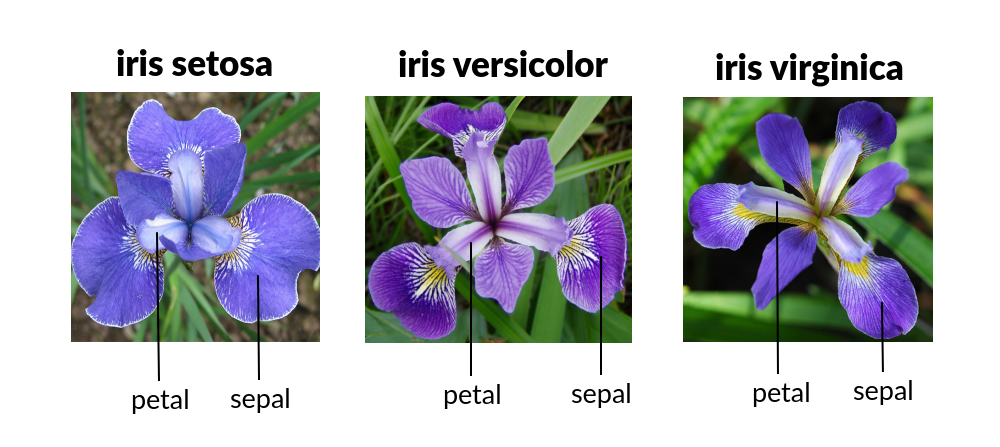

In [17]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#Dropping the 'Species' column
iris_clustering = iris.drop(columns =['Species'])
#Selecting 2 random features from the dataset for clustering
X = iris_clustering.iloc[:,[0,2]].values
                            

In [ ]:
X

## Using the elbow method to find the optimal number of clusters

In [19]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\a

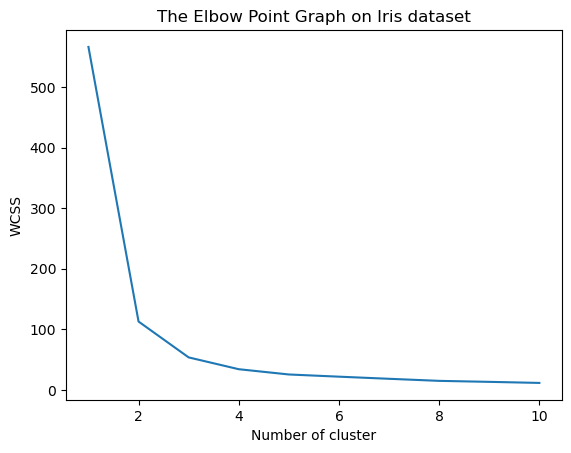

In [20]:
#plotting the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph on Iris dataset')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

## Initialising K-Means With Optimum Number of Clusters

In [21]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state=0)
#return a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
kmeans.inertia_   #惯性：样本到最近聚类中心的距离平方和

53.801351193126536

In [24]:
kmeans.n_iter_

4

In [25]:
kmeans.cluster_centers_

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

## Visualizing the clusters

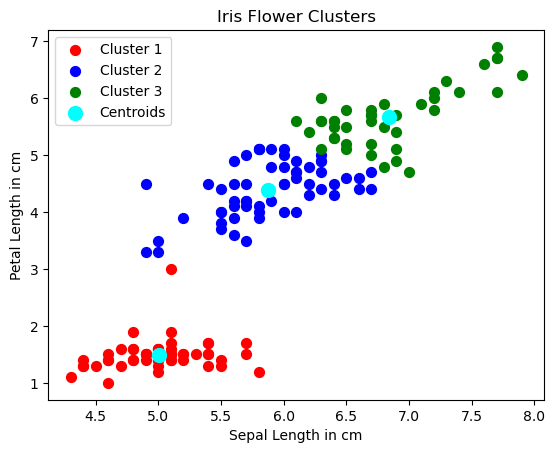

In [26]:
# Visualising the clusters
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

## Dataset weight-height.csv

In [27]:
wh = pd.read_csv('weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [28]:
X = wh.iloc[:,[1,2]].values
X

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       ...,
       [ 63.86799221, 128.47531878],
       [ 69.03424313, 163.85246135],
       [ 61.94424588, 113.64910268]])

In [29]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

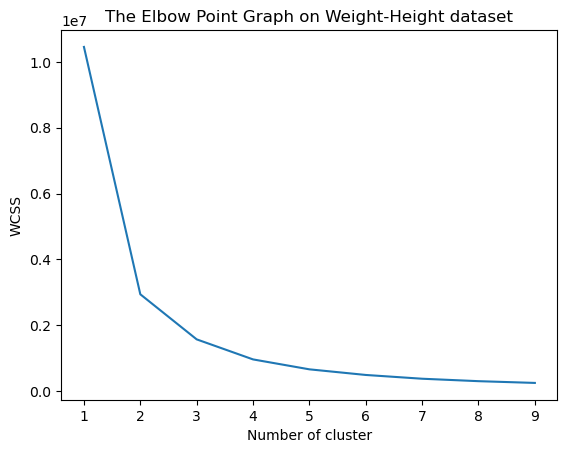

In [30]:
#plotting the elbow graph
plt.plot(range(1,10),wcss)
plt.title('The Elbow Point Graph on Weight-Height dataset')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [31]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state=0)
#return a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 0 ... 1 2 1]


## Visualizing the clusters

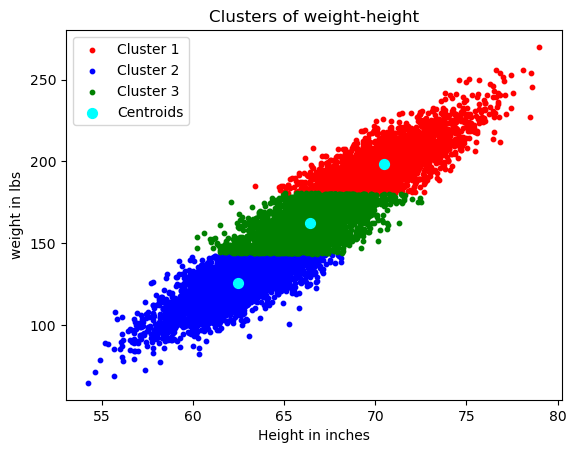

In [32]:
# Visualising the clusters
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'Centroids')
plt.title('Clusters of weight-height')
plt.xlabel('Height in inches')
plt.ylabel('weight in lbs')
plt.legend()
plt.show()

# Example: k-means for color compression

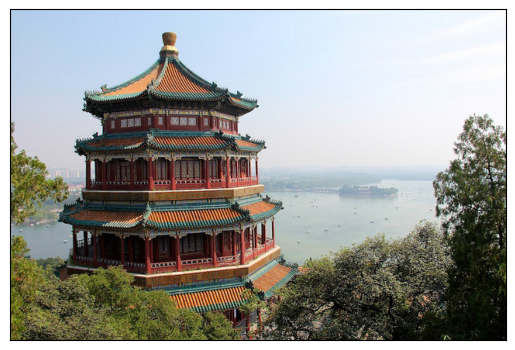

In [33]:
# Note: this requires the 'pillow' package to be  installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

The image itself is stored in a three-dimensional array of size(height, width, RGB), containing red/blue/green constributions as integers from 0 to 255

In [34]:
china.shape

(427, 640, 3)

In [35]:
data = china/255.0  #use 0...1 scale
data = data.reshape(427*640,3)
data.shape

(273280, 3)

we can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency.

In [36]:
def plot_pixels(data, title,colors =None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)  #choose a random subset
    i = rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B = data[i].T

    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))

    fig.suptitle(title,size=20);

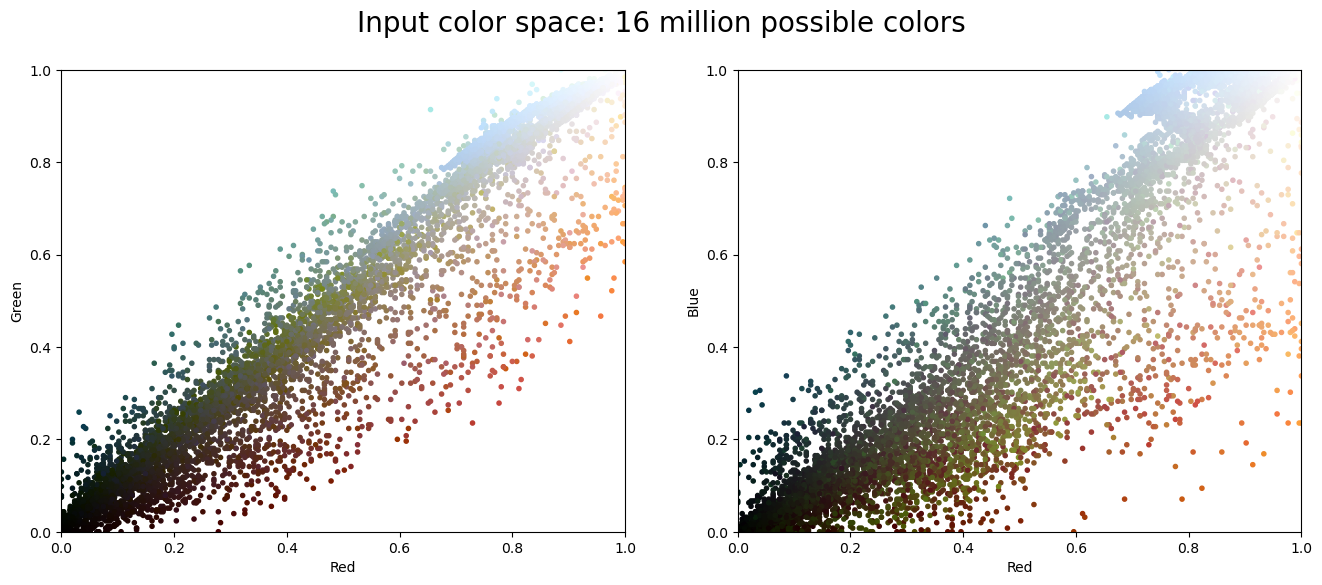

In [37]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
data

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithms;

In [ ]:
#import os
#os.environ["OMP_NUM_THREADS"] = '4'

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


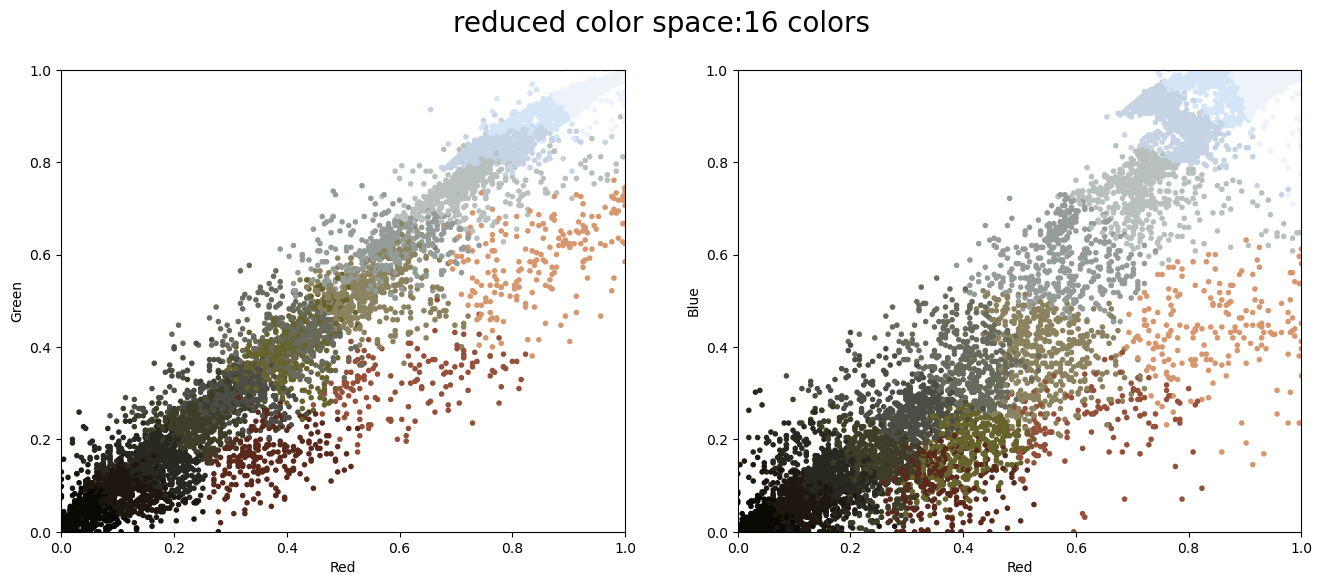

In [38]:
#import warnings;
#warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16,n_init='auto') #,n_init='auto'
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title="reduced color space:16 colors")


n_init‘auto’ or int, default=”auto”
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like.

Added in version 1.2: Added ‘auto’ option for n_init.

Changed in version 1.4: Default value for n_init changed to 'auto'.

Text(0.5, 1.0, '16-color Image')

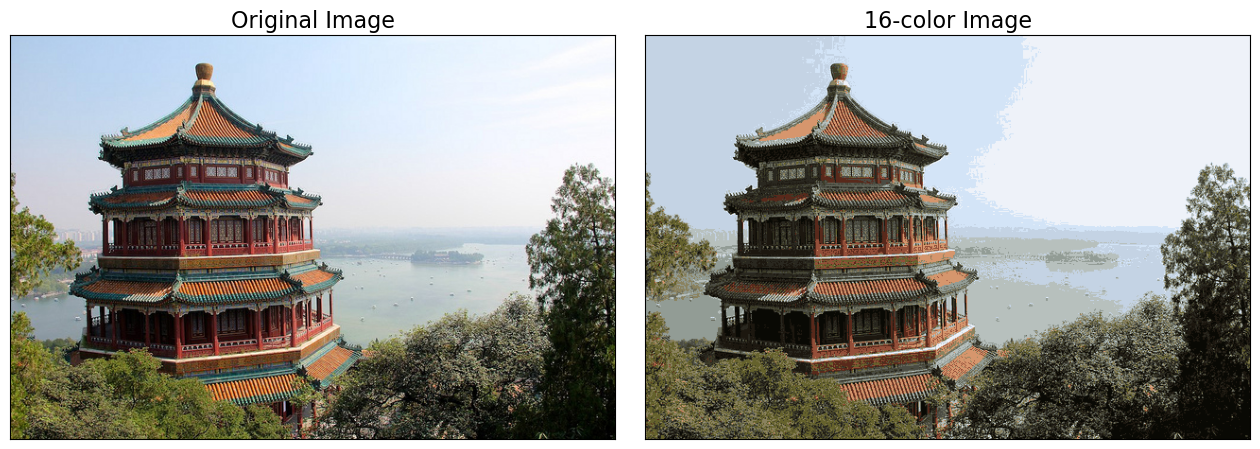

In [39]:
china_recolored = new_colors.reshape(china.shape)
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw = dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)

## This image on the right achieves a compression factor of around 1 million!